## Exercise 15

The files dat2a.txt and dat2b.txt contain sample data generated from some probability distributions.  Using  the  Kolmogorov-Smirnov test check if at $\alpha= 0.05)$ significance level:

* dat2a.txt come from the Gaussian N(5,2) distribution
* dat2b.txtcome from the Gaussian N(5,2) distribution
* dat2a.txt and dat2b.txt come from the same distribution.

In each case compute the test statistic: $D_N$ and the p-value: $Q_{KS}$(u).

##### NOTE: KS formula for the p-value is valid only assymptoticaly, i.e.  for $N\rightarrow \infty$.  For finite (and not too large) $N$ in a single distribution KS test you can use a correction:

$$ u \rightarrow u+\frac{1}{6\sqrt N} + \frac{u-1}{4N}$$

to get a result closer to some software (e.g. Wolfram Mathematica) automatic functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, kstest, ks_2samp

%matplotlib inline

In [2]:
raw_data_2a = pd.read_csv('dat2a.csv', sep=' ', names = ['a'])
raw_data_2b = pd.read_csv('dat2b.csv', sep=' ', names=['b'])

data_a = np.array(raw_data_2a['a'])
data_b = np.array(raw_data_2b['b'])

data_a.sort()
data_b.sort()

n_a = len(data_a)
n_b = len(data_b)

alpha = 0.05  # significance level

In [3]:
print("data a: mean = {:}, std = {:}".format(np.mean(data_a), np.std(data_a)))
print("data b: mean = {:}, std = {:}".format(np.mean(data_b), np.std(data_b)))

data a: mean = 5.0524942218102264, std = 1.9776267892696542
data b: mean = 5.144287068225364, std = 1.9741548225308172


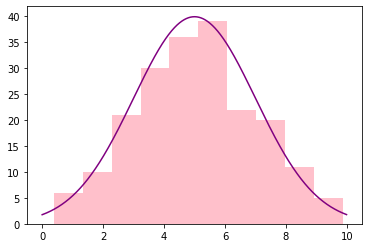

In [4]:
dt = 0.01
t = np.arange(0, 10, dt)
gauss = norm.pdf(t,5,2)


fig, ax = plt.subplots()

ax.hist(data_a, color = 'pink')
ax.plot(t,gauss*n_a, color = 'purple')

plt.show()

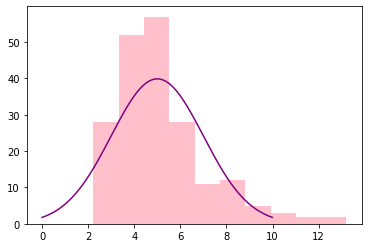

In [5]:
dt = 0.01
t = np.arange(0, 10, dt)
gauss = norm.pdf(t,5,2)


fig, ax = plt.subplots()

ax.hist(data_b, color = 'pink')
ax.plot(t,gauss*n_a, color = 'purple')

plt.show()

## Crafting:

In [6]:
def komogorov_smirkov_normal(data, mu, sigma):
    
    n=len(data)
    target = norm(mu, sigma)      # Normal mean 5, stddev 2
    cdfs = target.cdf(data)

    ecdfs = np.arange(n+1, dtype=float)/n
    gaps = np.column_stack([cdfs - ecdfs[:n], ecdfs[1:] - cdfs])
    D_N = np.max(gaps)
    K_N = np.sqrt(n)*D_N

    print('Test statistics D_N = {:2f}, D_N*sqrt(n) = {:2f}'.format(D_N, K_N))    

In [7]:
komogorov_smirkov_normal(data_a, 5,2)

Test statistics D_N = 0.029311, D_N*sqrt(n) = 0.414526


In [8]:
komogorov_smirkov_normal(data_b, 5,2)

Test statistics D_N = 0.105858, D_N*sqrt(n) = 1.497055


## funkcja pythona

In [9]:
D_N, p_value = kstest(data_a, 'norm', args=(5,2))
print("data a: test statistic: D_N = {:},  p-value = {:}".format(D_N, p_value) )

data a: test statistic: D_N = 0.029311419680829287,  p-value = 0.9953928141395783


In [10]:
D_N, p_value = kstest(data_b, 'norm', args=(5,2))
print("data b: test statistic: D_N = {:},  p-value = {:}".format(D_N, p_value) )

data b: test statistic: D_N = 0.10585777352235481,  p-value = 0.020937828167386912


In [11]:
D_N, p_value = ks_2samp(data_a, data_b)

print("Test statistic: D_N = {:},  p-value = {:}".format(D_N, p_value) )

Test statistic: D_N = 0.115,  p-value = 0.1420746514551761


## Testing the same for modified data:


In [12]:
n = len(data_a)

modified_a = data_a + 1/(6*np.sqrt(n)) + (data_a-1)/(4*n) 
modified_b = data_b + 1/(6*np.sqrt(n)) + (data_b-1)/(4*n) 

In [13]:
D_N, p_value = kstest(modified_a, 'norm', args=(5,2))

print("data a: test statistic: D_N = {:},  p-value = {:}".format(D_N, p_value) )

data a: test statistic: D_N = 0.03156499520759892,  p-value = 0.9885024417628892


In [14]:
D_N, p_value = kstest(modified_b, 'norm', args=(5,2))
print("data b: test statistic: D_N = {:},  p-value = {:}".format(D_N, p_value) )

data b: test statistic: D_N = 0.10247590280256713,  p-value = 0.027846615284722414


In [15]:
D_N, p_value = ks_2samp(modified_a, modified_b)

print("Test statistic: D_N = {:},  p-value = {:}".format(D_N, p_value) )

Test statistic: D_N = 0.115,  p-value = 0.1420746514551761
